In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np # 이미지는 기본적으로 2차원 배열이기 때문
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(250, 202, 3)
(250, 202)


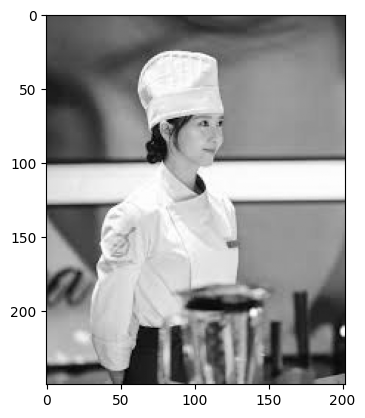

In [3]:
img = cv2.imread('/content/gdrive/My Drive/IP/Ch01/yoona.jpg')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap = 'gray')

In [4]:
def saturation(val):
  if val > 255:
    return 255
  elif val < 0:
    return 0
  else:
    return val

In [5]:
gPoint = np.zeros((gImg.shape[0], gImg.shape[1]), dtype = np.ubyte)

역 변환 실습

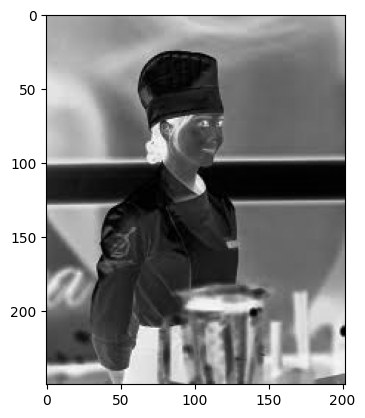

In [7]:
for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    pointVal = 255 - np.int32(gImg[h, w])
    gPoint[h, w] = saturation(pointVal)

plt.imshow(gPoint, cmap='gray')

이진화

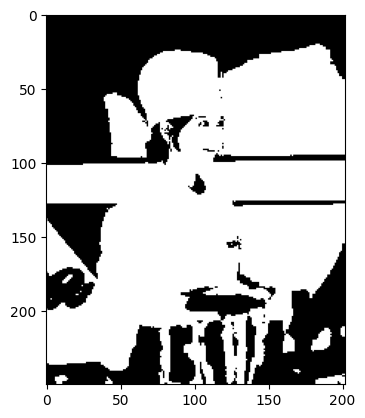

In [15]:
th = 130
for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    if gImg[h, w] > th:
      gPoint[h, w] = 255
    else:
      gPoint[h, w] = 0

plt.imshow(gPoint, cmap='gray')

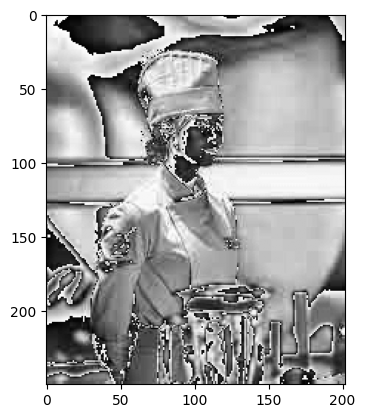

In [23]:
numOfClip = 3
modVal = 256/numOfClip

for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    pointVal = np.int32(gImg[h, w]) % modVal
    gPoint[h, w] = saturation(pointVal * numOfClip)

plt.imshow(gPoint, cmap='gray', vmin=0, vmax=255)